In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataframe.csv')
df.head(5)

,Unnamed: 0,travelClass,bookingStatus,status1Day,status1Month,status1Week,status2Days,labels
0,0,3A,21,28,12,14,15,0.0
1,1,3A,14,63,-1,-1,-1,0.0
2,2,3A,39,-1,-1,-1,18,0.0
3,3,3A,11,46,8,-1,-1,0.0
4,4,3A,20,-1,-1,7,-1,0.0


In [9]:
df.shape

(53381, 8)

In [15]:
df.isna().sum()

Unnamed: 0       0
travelClass      0
bookingStatus    0
status1Day       0
status1Month     0
status1Week      0
status2Days      0
labels           0
dtype: int64

In [20]:
df['travelClass'].unique()

array(['3A', '2A', 'SL', '1A', 'CC', '2S'], dtype=object)

In [25]:
encoding=LabelEncoder()

In [27]:
df['travelClass']=encoding.fit_transform(df['travelClass'])
df.head(5)

,Unnamed: 0,travelClass,bookingStatus,status1Day,status1Month,status1Week,status2Days,labels
0,0,3,21,28,12,14,15,0.0
1,1,3,14,63,-1,-1,-1,0.0
2,2,3,39,-1,-1,-1,18,0.0
3,3,3,11,46,8,-1,-1,0.0
4,4,3,20,-1,-1,7,-1,0.0


In [29]:
X = df.drop(['Unnamed: 0','labels'],axis=1)
y = df['labels']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,shuffle=True,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40035, 6), (13346, 6), (40035,), (13346,))

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [40]:
y_pred_proba=lr.predict_proba(X_test)
y_pred_proba

array([[5.15666392e-01, 4.84333608e-01],
       [9.99461736e-01, 5.38263630e-04],
       [9.99280395e-01, 7.19605456e-04],
       ...,
       [9.99999566e-01, 4.34415583e-07],
       [1.00000000e+00, 8.40520052e-25],
       [1.00000000e+00, 5.86113822e-12]])

In [41]:
y_pred = lr.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.9489734751985613

In [53]:
cm=confusion_matrix(y_test,y_pred)

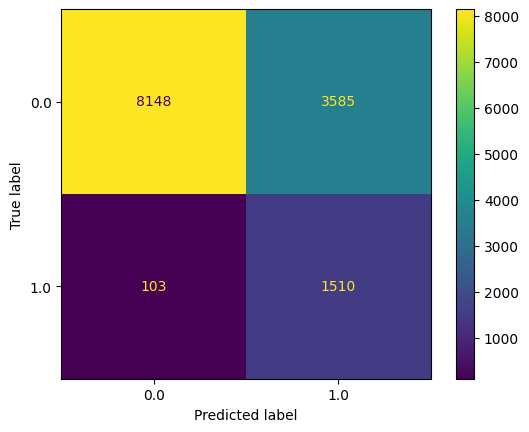

In [57]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()